## Titanic EDA Notebook

## 1.Import Libraries and Load Dataset

In [ ]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. Load Dataset
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2.Basic Information and Missing Values

In [ ]:
## Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
## Checking for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
## Imputing Missing Values
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop('Cabin',axis=1,inplace=True)

## 3.Summary Statistics

In [11]:
## Summary Statistics(mean,median,std) --> for all the numeric columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4.Visualisation

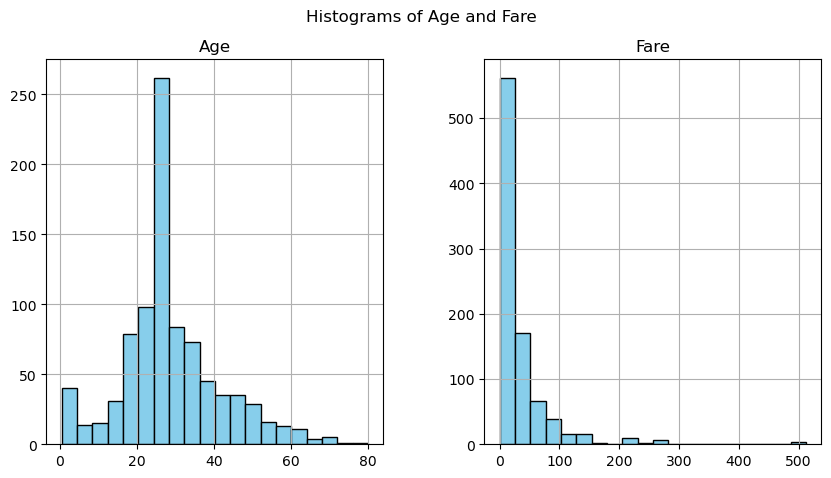

In [13]:
# 4.1 Histograms for Numeric Columns
numeric_cols = ['Age', 'Fare']
df[numeric_cols].hist(bins=20, figsize=(10, 5), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Age and Fare')
plt.show()

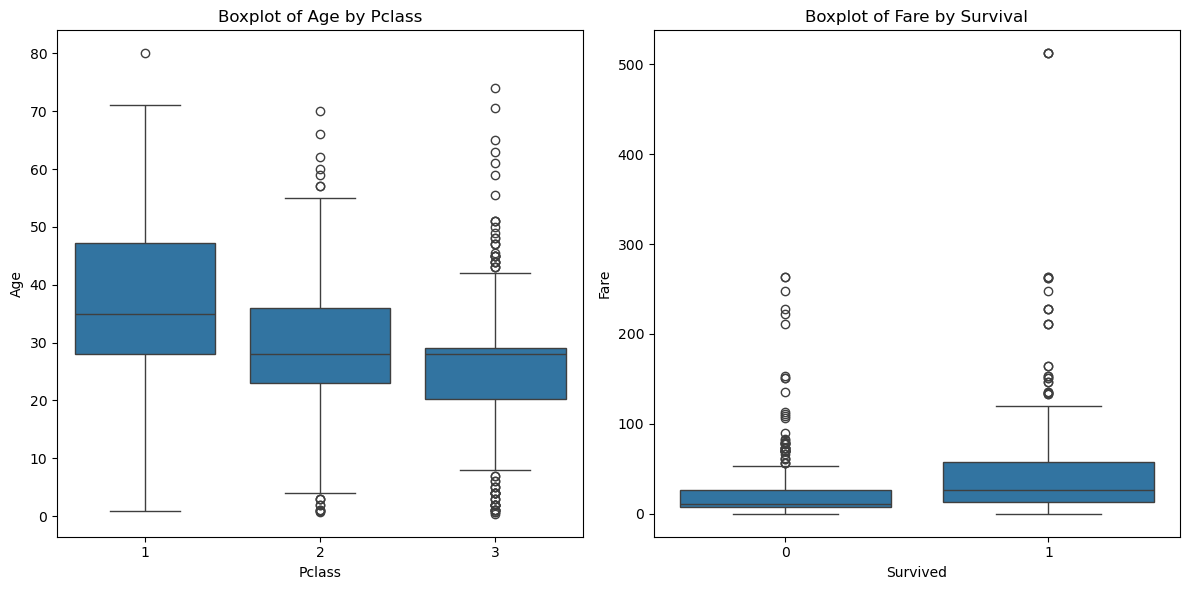

In [14]:
# 4.2 Boxplots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Boxplot of Age by Pclass')

plt.subplot(1, 2, 2)
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Boxplot of Fare by Survival')
plt.tight_layout()
plt.show()

## 5.Pairplot/Correlation Matrix

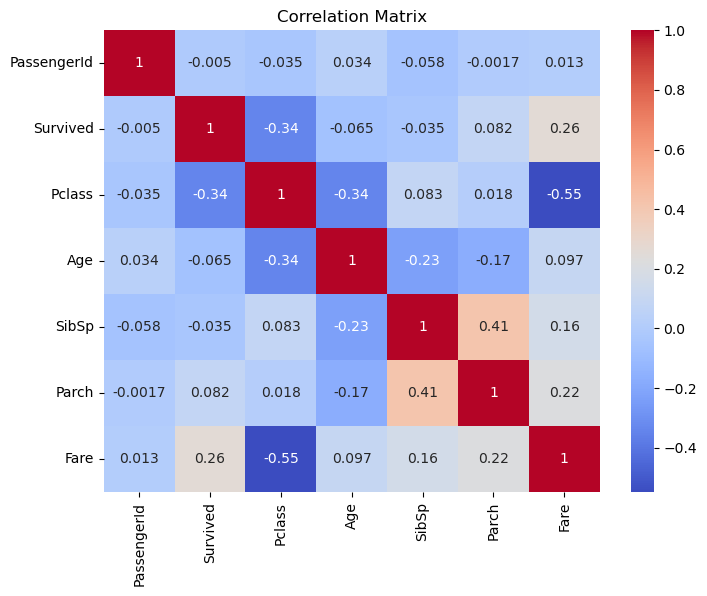

In [15]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

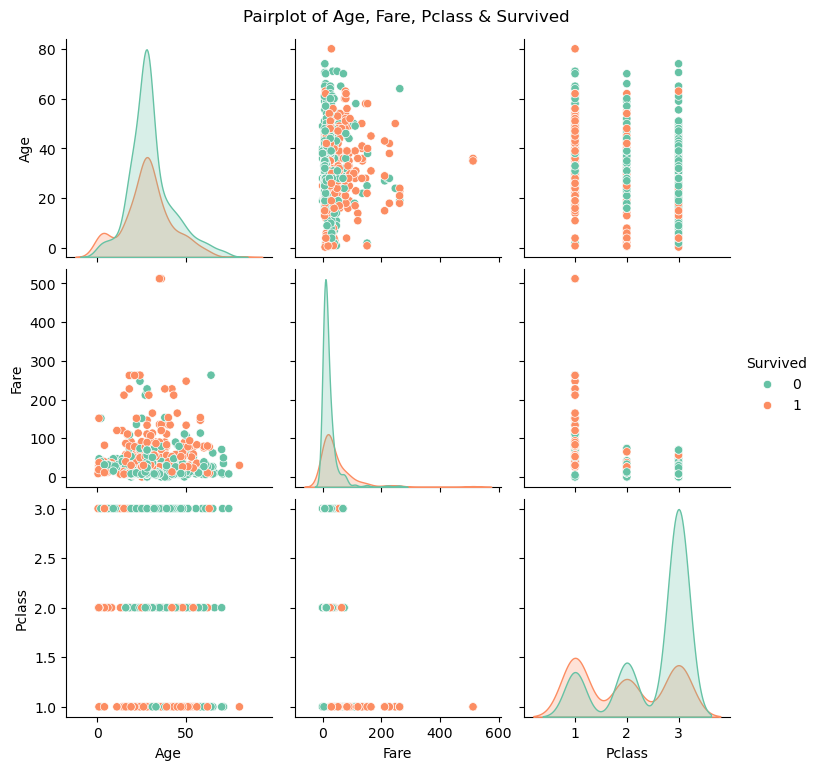

In [16]:
## Pairplot
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']].dropna(), hue='Survived', palette='Set2')
plt.suptitle("Pairplot of Age, Fare, Pclass & Survived", y=1.02)
plt.show()

## 6.Identifying Patterns, Trends, or Anomalies

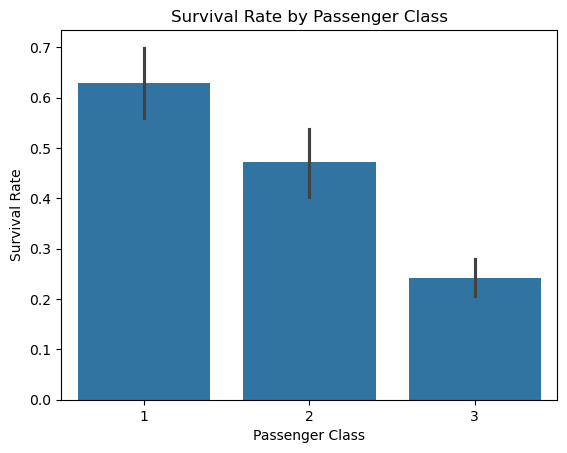

In [17]:
## Survival Rate by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


##  Observation:
Survival rate was highest in 1st class, followed by 2nd, and lowest in 3rd class. This reflects a clear socioeconomic disparity in survival during the Titanic disaster.



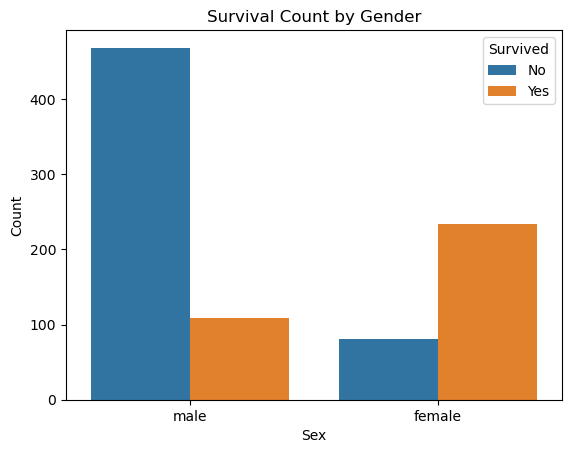

In [18]:
## Survival Count by Gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


## Observation:
Women survived at a much higher rate than men. This shows a strong gender bias in survival, likely due to evacuation protocols ("women and children first").



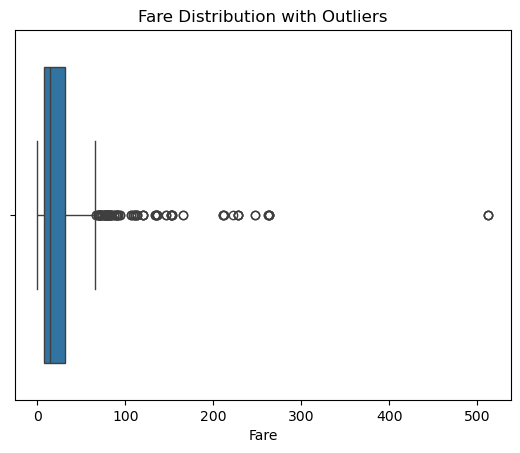

In [19]:
##  Fare Outliers
sns.boxplot(x=df['Fare'])
plt.title('Fare Distribution with Outliers')
plt.xlabel('Fare')
plt.show()


## Observation:
There are extreme outliers in the Fare column — some passengers paid extremely high fares, which may be linked with 1st class tickets.

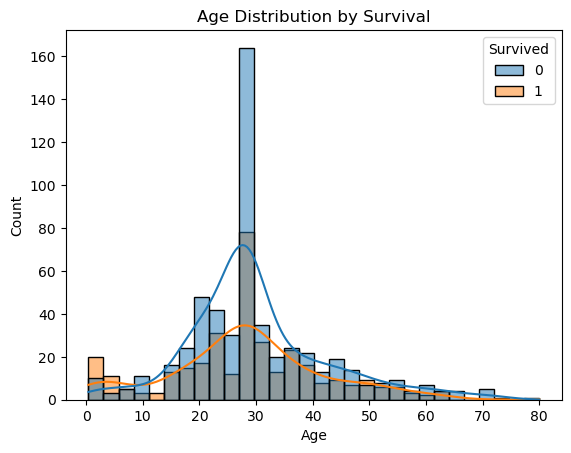

In [20]:
## Age Distribution by Survival
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


## Observation:
Children (low age) had relatively higher survival rates, while middle-aged and older passengers had a lower survival chance.



## 7.Making Basic Feature-Level Inferences from Visuals

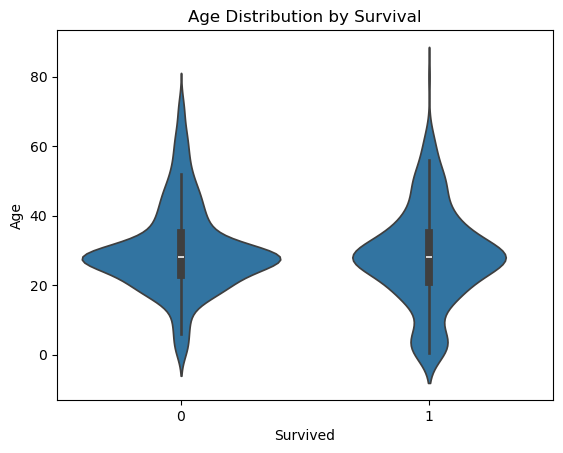

In [21]:
##  Age vs Survival (Violin Plot)
sns.violinplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


## Inference:
Survivors had a slightly lower average age than non-survivors, with many survivors being children. Younger passengers were more likely to survive.

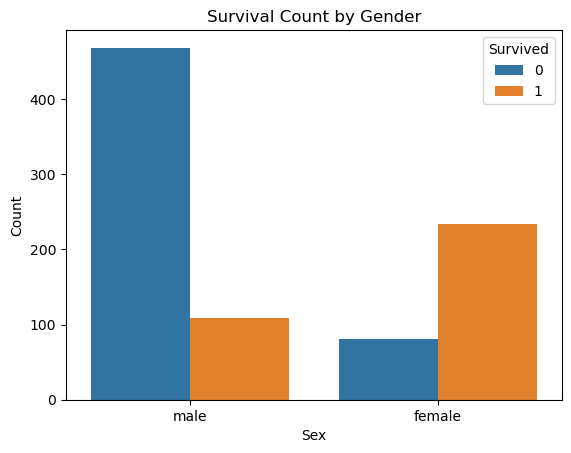

In [22]:
## Survival by Gender (Countplot)
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


## Inference:
Females had a significantly higher survival rate. Males make up the majority of non-survivors.



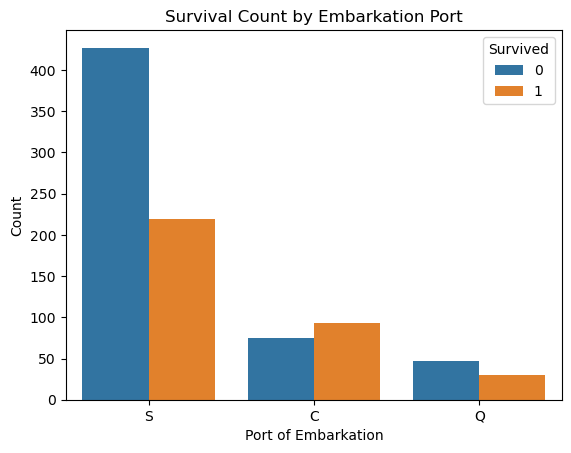

In [23]:
## Embarked vs Survival
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()


## Inference:
Passengers who embarked at port C (Cherbourg) had a higher chance of survival, likely due to a larger proportion of 1st class passengers.

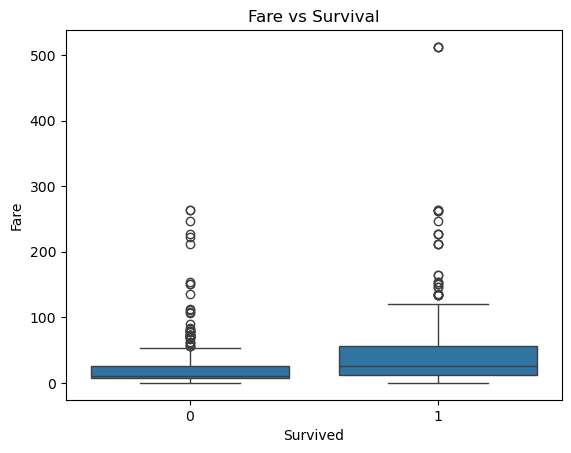

In [24]:
## Fare vs Survival
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()


## Inference:
Passengers who paid higher fares (typically 1st class) were more likely to survive.